# Démonstration, filtre de flou de mouvement ("motion blur")

In [1]:
# settings for display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# turn off matplotlib figure axes, else we need to call axes('off') everytime
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.set_cmap('gray') 
# mpl.rc('axes.spines',top=False,bottom=False,left=False,right=False)
# mpl.rc(('xtick','ytick'),color=(1,1,1,0))
mpl.rc('font', size=20)

import warnings
warnings.filterwarnings("ignore")

# import necessarry libs
from imageio import imread
import numpy as np
from scipy.signal import convolve2d as conv2
from skimage.color import rgb2gray
from skimage.transform import resize, rotate
from scipy.fftpack import fft2, fftshift, ifft2
from scipy.ndimage.filters import correlate, convolve

<IPython.core.display.Javascript object>


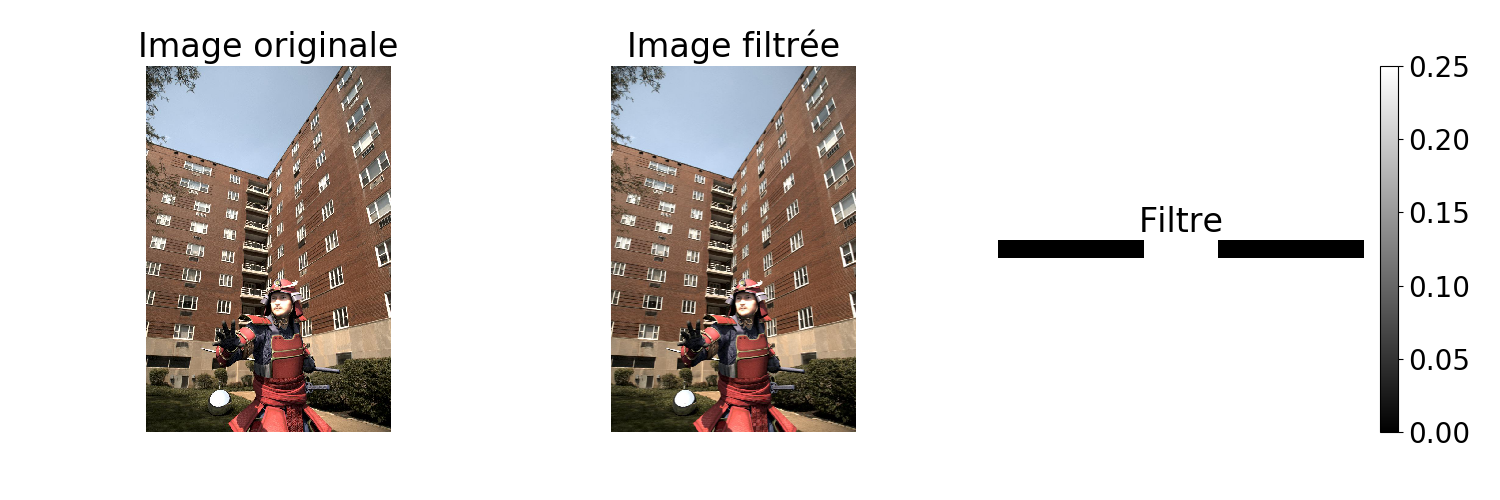

In [20]:
im = imread('img.jpg')/255.0;

theta = 33; 
length = 20;

filtre = np.ones([1, length]);
filtre = rotate(filtre, theta, resize=True);
filtre = filtre / np.sum(filtre[:]);

%matplotlib notebook
fig = plt.figure(figsize=(15,5), num='floumouvement')

ax1 = fig.add_subplot(1, 3, 1)
fmap = ax1.imshow(im); 
ax1.axis('off'); ax1.set_title('Image originale')

ax2 = fig.add_subplot(1, 3, 2, sharex = ax1, sharey = ax1)
fmap = ax2.imshow(convolve(im, filtre[:,:,np.newaxis])); 
ax2.axis('off'); ax2.set_title('Image filtrée');

ax3 = fig.add_subplot(1, 3, 3)
fmap = ax3.imshow(filtre); 
ax3.axis('off'); ax3.set_title('Filtre');
fig.colorbar(fmap, ax=ax3,fraction=0.046, pad=0.04)
plt.tight_layout()